### Using PCA because clusters so formed are not so distinct. Dimensionality Reduction will help in better visulaisation

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Dataset

In [2]:
df = pd.read_csv("Wholesale customers data.csv")

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


We already know that there are no null or duplicate values as the same dataset is being used.

In [14]:
df.shape

(440, 8)

## Preprocessing

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df)

## PCA

In [3]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=4)

principalComponents = pca.fit_transform(scaled_data)

In [8]:
principalComponents

array([[ 0.84393893, -0.51535075, -0.76763222, -0.0442148 ],
       [ 1.06267645, -0.48460126, -0.67297526,  0.40137178],
       [ 1.26914052,  0.68205455, -0.6640946 ,  1.63495276],
       ...,
       [ 3.86514909, -0.47985376, -0.52534452, -0.68713197],
       [-1.09706738, -0.06989568, -0.63012755,  0.31182088],
       [-1.16595067, -0.90215675, -0.59770486,  0.34265555]])

In [9]:
pca.explained_variance_ratio_

array([0.38750123, 0.22374588, 0.12647173, 0.09229904])

In [10]:
0.38750123 + 0.22374588 + 0.12647173 + 0.09229904

0.83001788

A total of 83% of the total variance of the original data is explained by feature extraction using PCA (0.38750123 + 0.22374588 + 0.12647173 + 0.09229904 = 0.83001788)

In [11]:
## Eigen Values

pca.singular_values_

array([36.9324292 , 28.06395368, 21.09930107, 18.02477769])

In [12]:
pca.components_

array([[ 4.28291564e-01,  2.47260253e-02, -2.53194580e-02,
         4.74409947e-01,  5.36329145e-01, -2.99745579e-02,
         5.23906297e-01,  1.64996527e-01],
       [-2.04698855e-01,  4.31296430e-02,  5.13444679e-01,
         2.05540611e-01, -8.71761988e-03,  5.92745252e-01,
        -1.21083091e-01,  5.33180819e-01],
       [-8.29798863e-02, -9.82500889e-01, -8.89509074e-02,
         2.57510842e-02,  4.53143572e-02,  1.22156522e-01,
         4.74814388e-02, -9.30199386e-04],
       [ 2.96441646e-02,  7.78446249e-02, -7.98475924e-01,
         5.40220237e-02, -1.21586244e-01,  1.61316883e-01,
        -1.51012112e-01,  5.37557669e-01]])

### Creating new dataframe after PCA transformation

In [13]:
principal_df = pd.DataFrame(data = principalComponents
                           , columns = ['pc1','pc2', 'pc3', 'pc4'])
                           
principal_df

,pc1,pc2,pc3,pc4
0,0.843939,-0.515351,-0.767632,-0.044215
1,1.062676,-0.484601,-0.672975,0.401372
2,1.269141,0.682055,-0.664095,1.634953
3,-1.056782,0.610821,-0.505654,0.196005
4,0.634030,0.974199,-0.771209,0.186374
...,...,...,...,...
435,0.222884,2.480505,-0.360936,-0.601036
436,-1.290172,1.560397,-0.756171,-1.342401
437,3.865149,-0.479854,-0.525345,-0.687132
438,-1.097067,-0.069896,-0.630128,0.311821


## Model Building

In [16]:
from sklearn.cluster import KMeans

### Elbow Curve

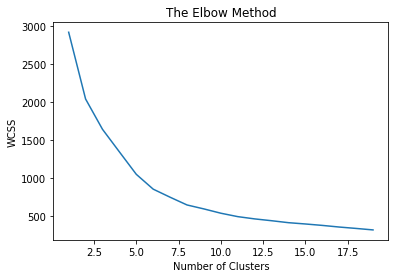

In [17]:
distance = []
k = range(1,20)

for value in k:
    km_model = KMeans(n_clusters = value, random_state = 42)
    km_model.fit(principal_df)
    distance.append(km_model.inertia_)
    
plt.plot(k, distance)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

2 and 5 seem to be the best values

### 2 clusters

In [21]:
kmeans2 = KMeans(n_clusters=2, verbose = True, random_state = 42, max_iter=100)

y_pred2 = kmeans2.fit_predict(principal_df)

Initialization complete
Iteration 0, inertia 2286.1557719389066
Iteration 1, inertia 2051.2740623188097
Iteration 2, inertia 2044.5008078446267
Iteration 3, inertia 2043.443338732584
Iteration 4, inertia 2042.981198871069
Iteration 5, inertia 2042.9400493346832
Iteration 6, inertia 2042.8992043210699
Iteration 7, inertia 2042.863395848071
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 2983.4007024580756
Iteration 1, inertia 2247.628765175472
Iteration 2, inertia 2062.4865336733224
Iteration 3, inertia 2043.850546313116
Iteration 4, inertia 2043.111388753962
Iteration 5, inertia 2042.9400493346832
Iteration 6, inertia 2042.8992043210699
Iteration 7, inertia 2042.863395848071
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 2767.1926500074037
Iteration 1, inertia 2140.222856699009
Iteration 2, inertia 2116.936873115139
Iteration 3, inertia 2091.360678153555
Iteration 4, inertia 2069.6287262109468
Iterat

In [22]:
y_pred2

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [23]:
kmeans2.inertia_

2042.863395848071

Inertia has decreased enough compared to when 2 clusters were built without PCA

Without PCA, inertia for 2 clusters was 2599.3855593561393

In [24]:
principal_df['2 clusters result'] = y_pred2

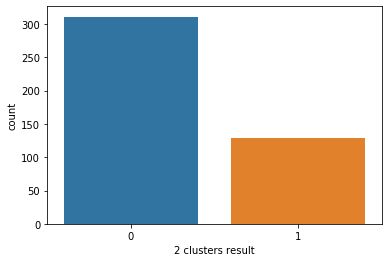

In [26]:
sns.countplot(principal_df['2 clusters result'])

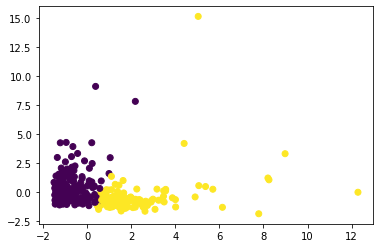

In [30]:
plt.scatter(principal_df.pc1, principal_df.pc2, c = principal_df['2 clusters result'] )

Far better clusters have been obtained

### Davies Bouldin Score for 2 clusters

In [31]:
import sklearn.metrics

sklearn.metrics.davies_bouldin_score(principal_df, y_pred2)

1.0717240401485155

### 5 Clusters

In [33]:
kmeans5 = KMeans(n_clusters=5, verbose = True, random_state = 42, max_iter=100)

y_pred5 = kmeans5.fit_predict(principal_df)

Initialization complete
Iteration 0, inertia 1353.4236689610077
Iteration 1, inertia 1168.7783971232038
Iteration 2, inertia 1140.5181994635743
Iteration 3, inertia 1125.277276507243
Iteration 4, inertia 1119.7250116840505
Iteration 5, inertia 1113.5104151978078
Iteration 6, inertia 1106.4017622554802
Iteration 7, inertia 1101.8654127827433
Iteration 8, inertia 1100.4261986755025
Iteration 9, inertia 1100.3533922269326
Iteration 10, inertia 1100.315099628276
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 1557.6832845297276
Iteration 1, inertia 1173.903311074875
Iteration 2, inertia 1151.1019841323682
Iteration 3, inertia 1141.1818328076952
Iteration 4, inertia 1138.715668244828
Iteration 5, inertia 1135.2139427957177
Iteration 6, inertia 1135.1484876256438
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 1591.9764077312186
Iteration 1, inertia 1266.3252171514062
Iteration 2, inertia 1250.046649989080

In [34]:
y_pred5

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 4, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 2, 1, 1, 0, 2,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 4, 1, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 2, 3, 3, 1, 3, 1, 3, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 1, 3, 1, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 3, 1, 1, 3, 1,

In [35]:
kmeans5.inertia_

1064.2856641306112

In [36]:
principal_df['5 clusters result'] = y_pred5

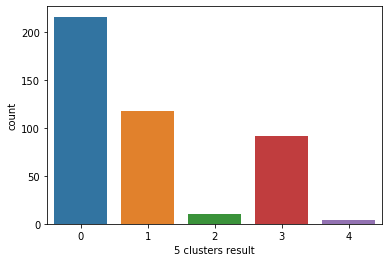

In [37]:
sns.countplot(principal_df['5 clusters result'])

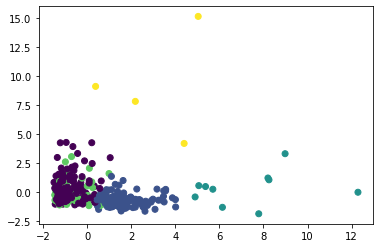

In [39]:
plt.scatter(principal_df.pc1, principal_df.pc2, c = principal_df['5 clusters result'] )

2 clusters seem to be optimal

### Davies Bouldin Score for 5 clusters

In [38]:
sklearn.metrics.davies_bouldin_score(principal_df, y_pred5)

0.8043852412005856